In [72]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='ticks')

# Customize colors
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

In [73]:
from wordcloud import WordCloud  

In [74]:
# Read the dataset
df = pd.read_csv("FIFA_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [76]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [77]:
df.shape

(18207, 89)

In [78]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [79]:
all = df.isnull().sum()
print_full(all)

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

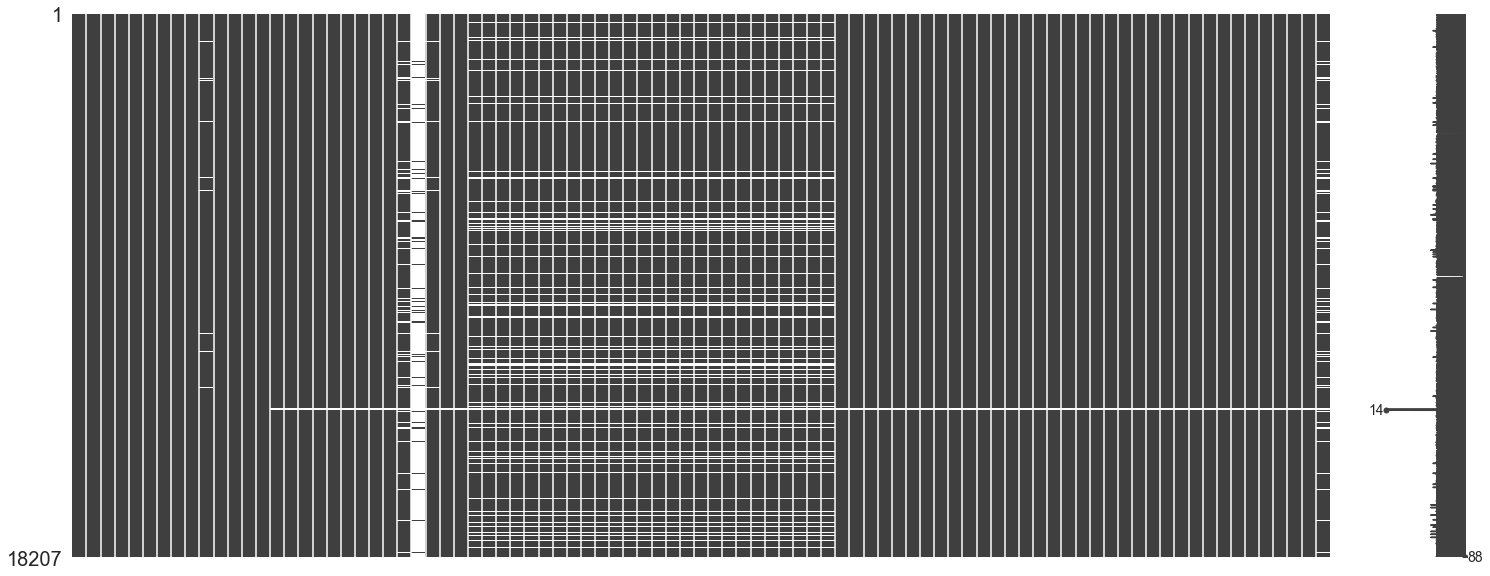

In [80]:
import missingno as msno
msno.matrix(df)

In [81]:
#msno.heatmap(df.sample(1000))

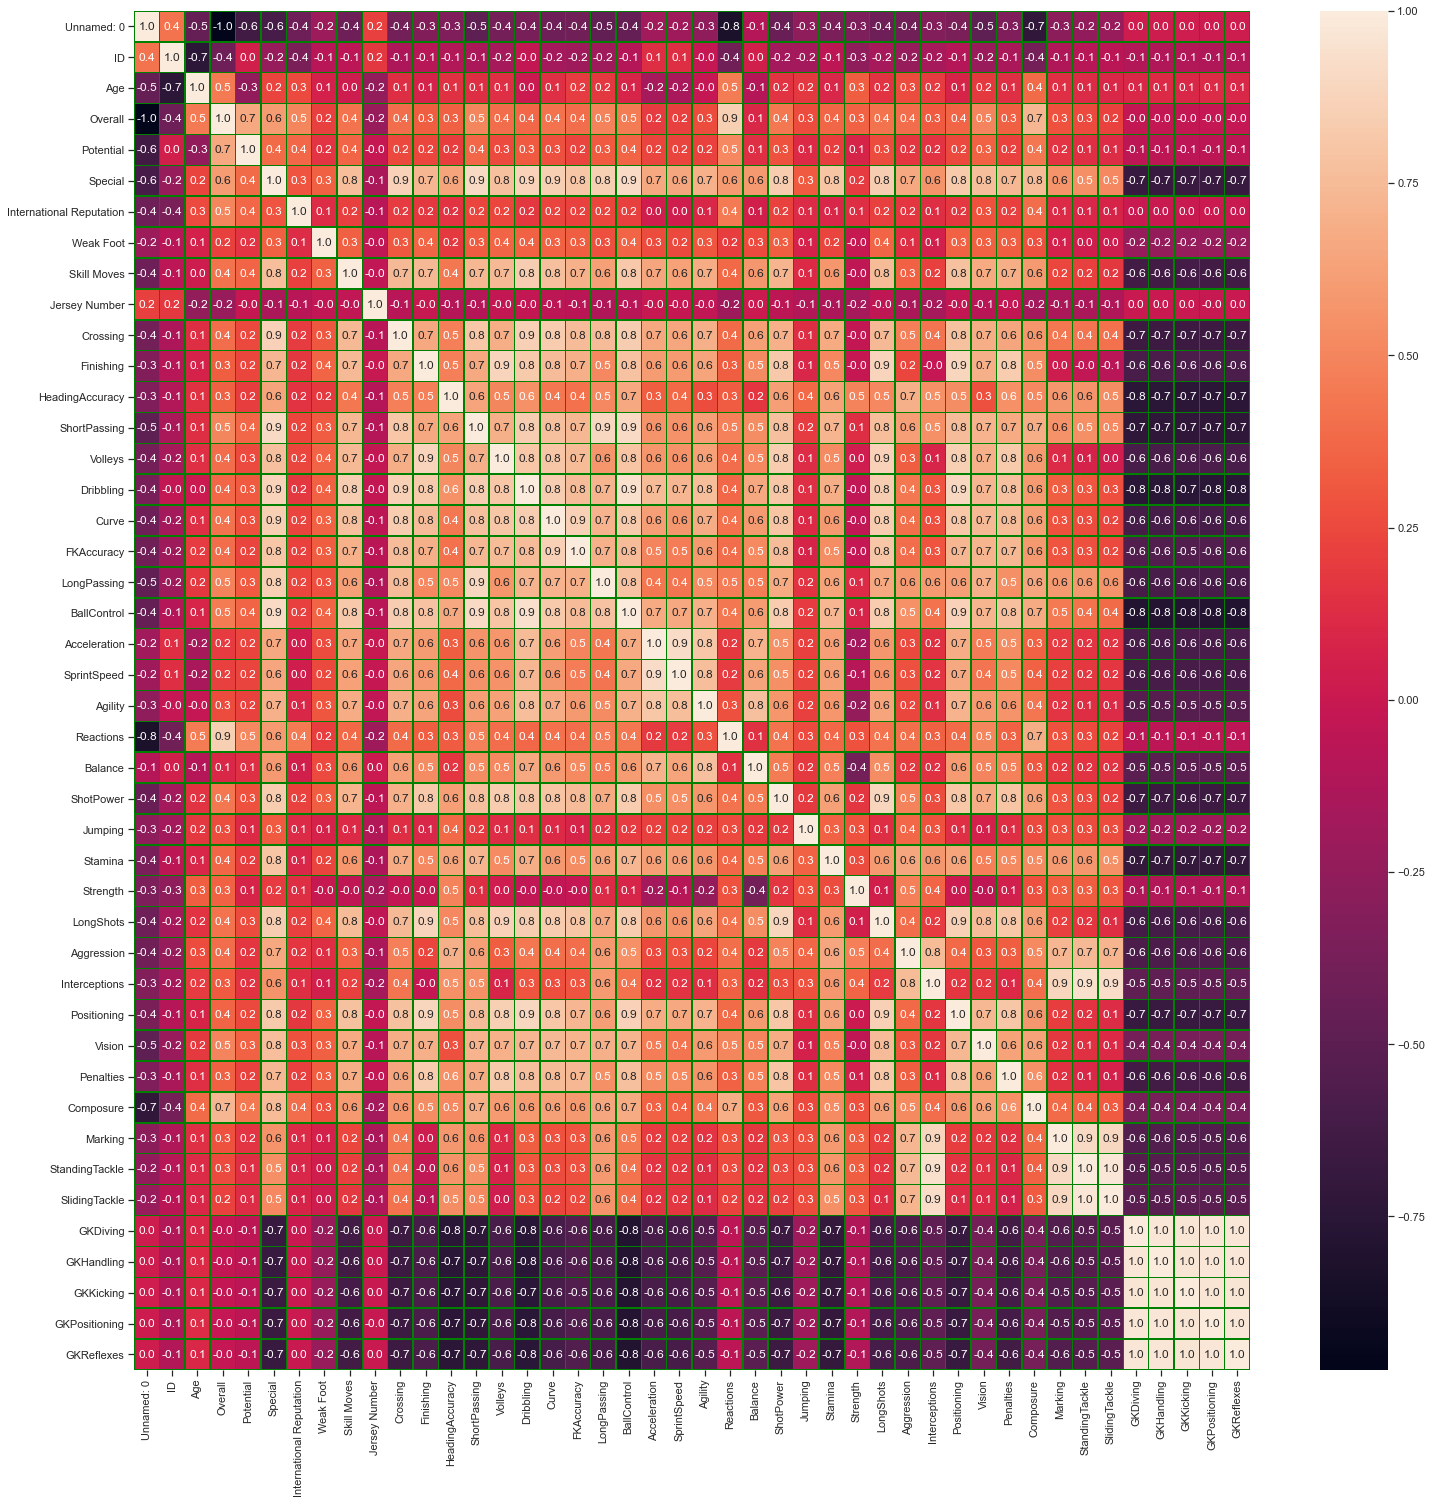

In [82]:
# Plot the heatmap of the correlation between columns
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor="green", fmt = '.1f', ax=ax)
plt.show()

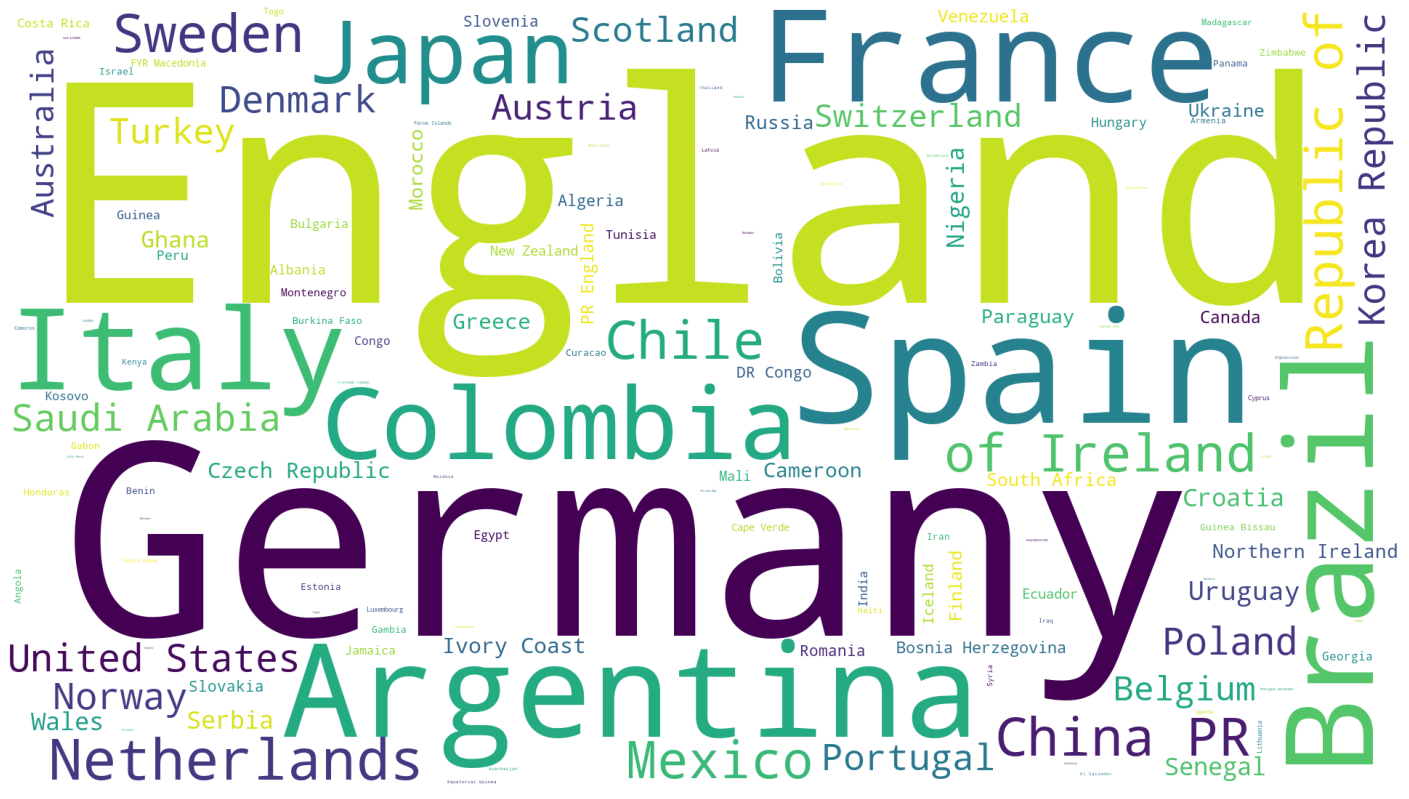

In [83]:
# plot the word cloud for nationality of players
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(
                        background_color="white",
                        width = 1920,
                        height = 1080,
                        ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

Most of the players are from England, germany, Argentina, Spain and Europeon regions.

In [84]:
# impute missing values
df['Club'].fillna('No Club', inplace=True)
df['Position'].fillna('ST', inplace=True)

In [85]:
# Impute missing values by mean
missing_by_mean = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]
missing_by_mean[:5]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [86]:
for i in missing_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace=True)

In [87]:
# Impute missing values in categorical variables by mode
missing_by_mode = df.loc[: , ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in missing_by_mode.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [88]:
# impute other variable, discrete and continuous with median
impute_by_median = df.loc[: , ['Weak Foot', 'Skill Moves']]

for i in impute_by_median.columns:
    df[i].fillna(df[i].median(), inplace=True)

In [89]:
df.columns[df.isnull().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [90]:
df.fillna(0, inplace = True) # Filling the remaining  missing values with zero
df.isnull().all().sum()

0

In [91]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle','SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [92]:
# Rename columns
df.rename(columns = {'Club Logo': 'Club_Logo'}, inplace=True)

In [93]:
# adding new columns to the data

df['Defending'] = df.apply(defending, axis=1)
df['General'] = df.apply(general, axis=1)
df['Mental'] = df.apply(mental, axis=1)
df['Passing'] = df.apply(passing, axis=1)
df['Mobility'] = df.apply(mobility, axis=1)
df['Power'] = df.apply(power, axis=1)
df['Rating'] = df.apply(rating, axis=1)
df['Shooting'] = df.apply(shooting, axis=1)


In [97]:
# creating the players dataset
players = df[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head(20)

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City
5,E. Hazard,28,83,72,84,92,75,91,82,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/teams/2/light/5.png,Chelsea
6,L. Modrić,70,81,80,89,84,77,91,78,https://cdn.sofifa.org/flags/10.png,32,Croatia,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/teams/2/light/243.png,Real Madrid
7,L. Suárez,48,85,78,74,84,81,91,87,https://cdn.sofifa.org/flags/60.png,31,Uruguay,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
8,Sergio Ramos,90,78,77,74,78,82,91,68,https://cdn.sofifa.org/flags/45.png,32,Spain,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/teams/2/light/243.png,Real Madrid
9,J. Oblak,19,14,41,23,64,61,92,14,https://cdn.sofifa.org/flags/44.png,25,Slovenia,https://cdn.sofifa.org/players/4/19/200389.png,https://cdn.sofifa.org/teams/2/light/240.png,Atlético Madrid


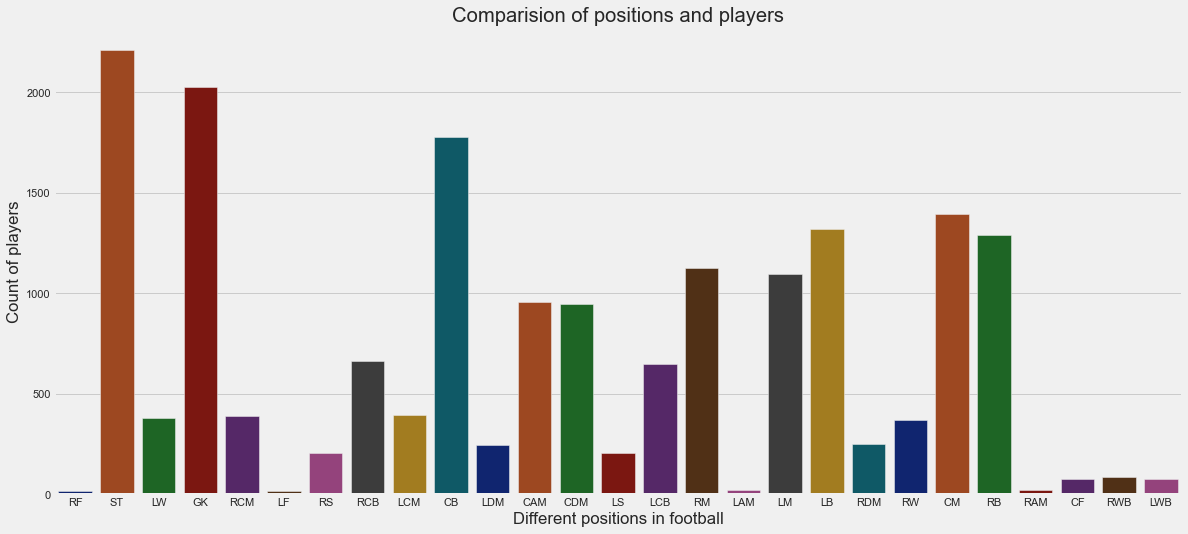

In [99]:
# Different position taken be players

plt.figure(figsize=(18,8))
plt.style.use("fivethirtyeight")
ax = sns.countplot('Position', data=df, palette='dark')
ax.set_xlabel("Different positions in football")
ax.set_ylabel("Count of players")
ax.set_title("Comparision of positions and players")
plt.show()

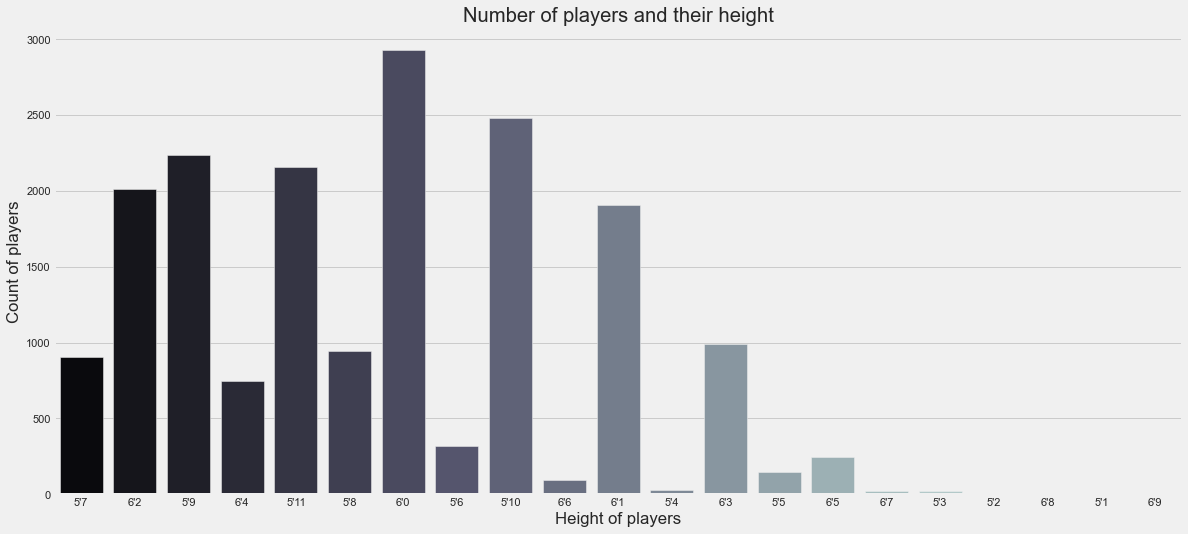

In [101]:
# Plot count of players based on their heights

plt.figure(figsize=(18,8))
ax = sns.countplot('Height', data=df, palette='bone')
ax.set_xlabel("Height of players")
ax.set_ylabel("Count of players")
ax.set_title("Number of players and their height")
plt.show()

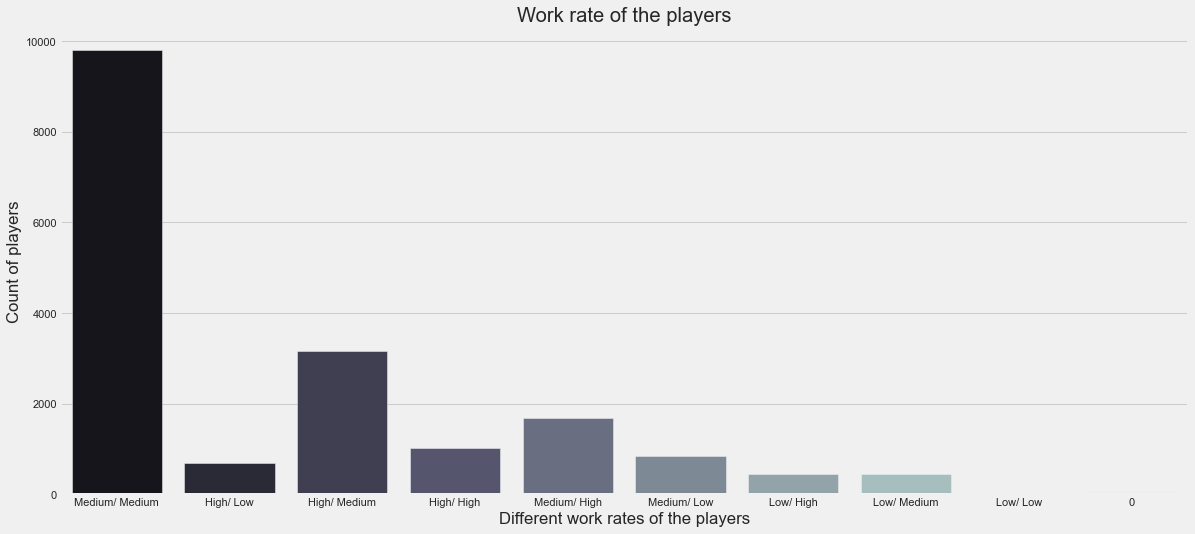

In [102]:
# Plot count of players based on their work rates

plt.figure(figsize=(18,8))
ax = sns.countplot('Work Rate', data=df, palette='bone')
ax.set_xlabel("Different work rates of the players")
ax.set_ylabel("Count of players")
ax.set_title("Work rate of the players")
plt.show()

In [131]:
Total_players = df.groupby("Nationality")["ID"].count().sort_values(ascending=False).head(10)
Total_players = pd.DataFrame(Total_players)
Total_players.rename(columns = {"ID":"Number"}, inplace=True)
Total_players

,Number
Nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478


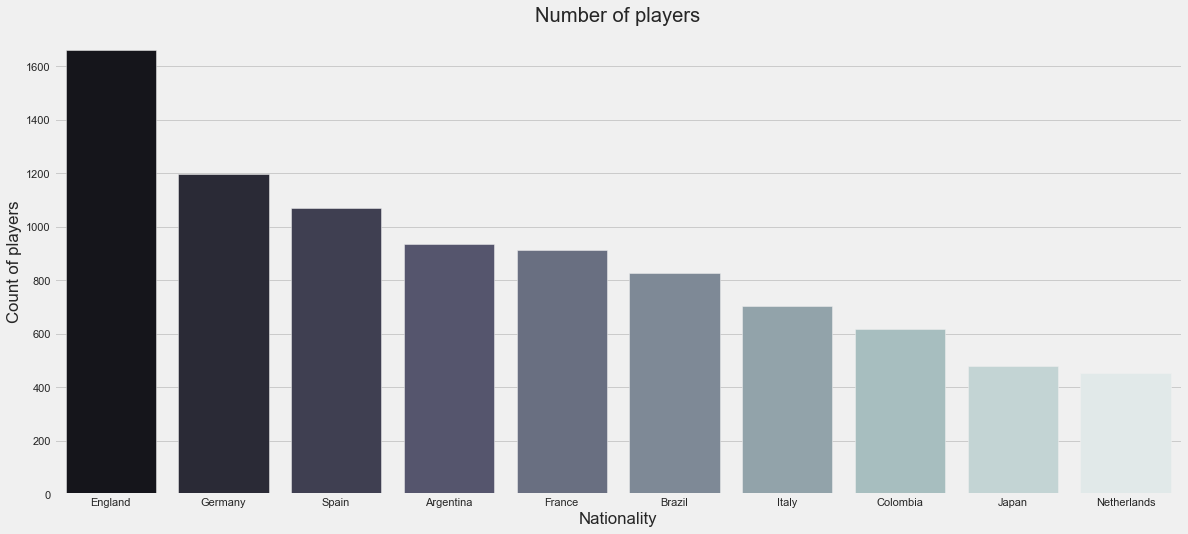

In [141]:
# Plot count of players based on their work rates

plt.figure(figsize=(18,8))
ax = sns.barplot(x = Total_players.index, y="Number", data=Total_players, palette='bone')
ax.set_xlabel("Nationality")
ax.set_ylabel("Count of players")
ax.set_title("Number of players")
plt.show()

In [167]:
Top_ratings = df.groupby(['Club'])["Rating"].mean().sort_values(ascending=False)[:10]
Top_ratings = pd.DataFrame(Top_ratings)
Top_ratings

,Rating
Club,
Juventus,83.880000
Napoli,81.760000
FC Barcelona,81.666667
Real Madrid,81.393939
Inter,80.541667
Paris Saint-Germain,80.466667
Manchester City,80.393939
Milan,80.370370
FC Bayern München,80.344828


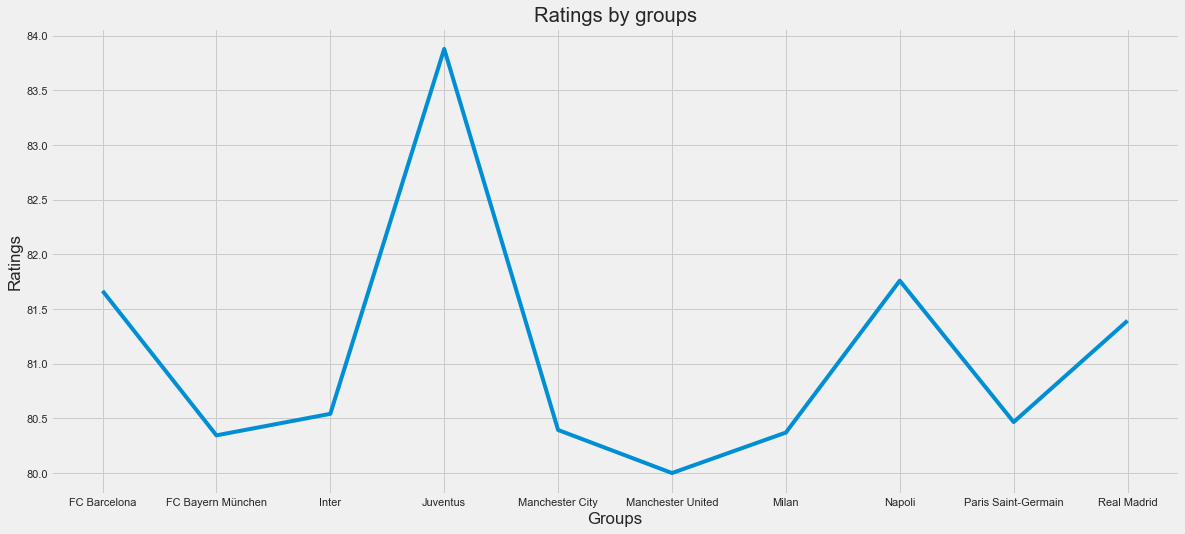

In [169]:
# Plot group with top ratings

plt.figure(figsize=(18,8))
ax = sns.lineplot(x = Top_ratings.index, y="Rating", data=Top_ratings, palette='bone')
ax.set_xlabel("Groups")
ax.set_ylabel("Ratings")
ax.set_title("Ratings by groups")
plt.show()

Juventus was the highest rated group.

In [171]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,defending
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,€226.5M,29,89,71,87,91,74,94,88,29
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,€127.1M,27,88,73,81,91,83,94,88,27
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,€228.1M,28,85,72,80,94,69,92,84,28
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,€138.6M,16,26,43,39,66,54,92,21,16
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,€196.4M,59,79,81,92,81,76,92,85,59


In [185]:
penalty = df.groupby("Name")["Penalties"].count().sort_values(ascending=False)[:10]
penalty = pd.DataFrame(penalty)
penalty

,Penalties
Name,
J. Rodríguez,11
Paulinho,8
R. Williams,7
J. Williams,7
J. Valencia,6
J. Gómez,6
Felipe,6
J. Hernández,6
J. Torres,5


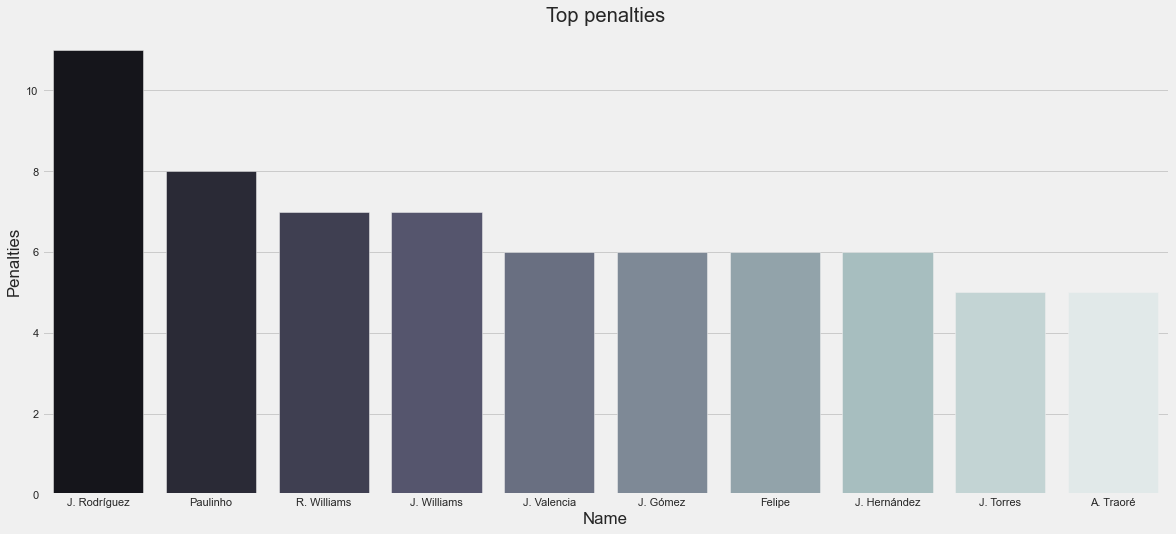

In [186]:
# Plot the number of penalties

plt.figure(figsize=(18,8))
ax = sns.barplot(x = penalty.index, y="Penalties", data=penalty, palette='bone')
ax.set_xlabel("Name")
ax.set_ylabel("Penalties")
ax.set_title("Top penalties")
plt.show()

In [182]:
penalty

,Penalties
Name,
J. Rodríguez,11
Paulinho,8
R. Williams,7
J. Williams,7
J. Valencia,6
...,...
M. Rasner,1
M. Rasmussen,1
M. Rashica,1


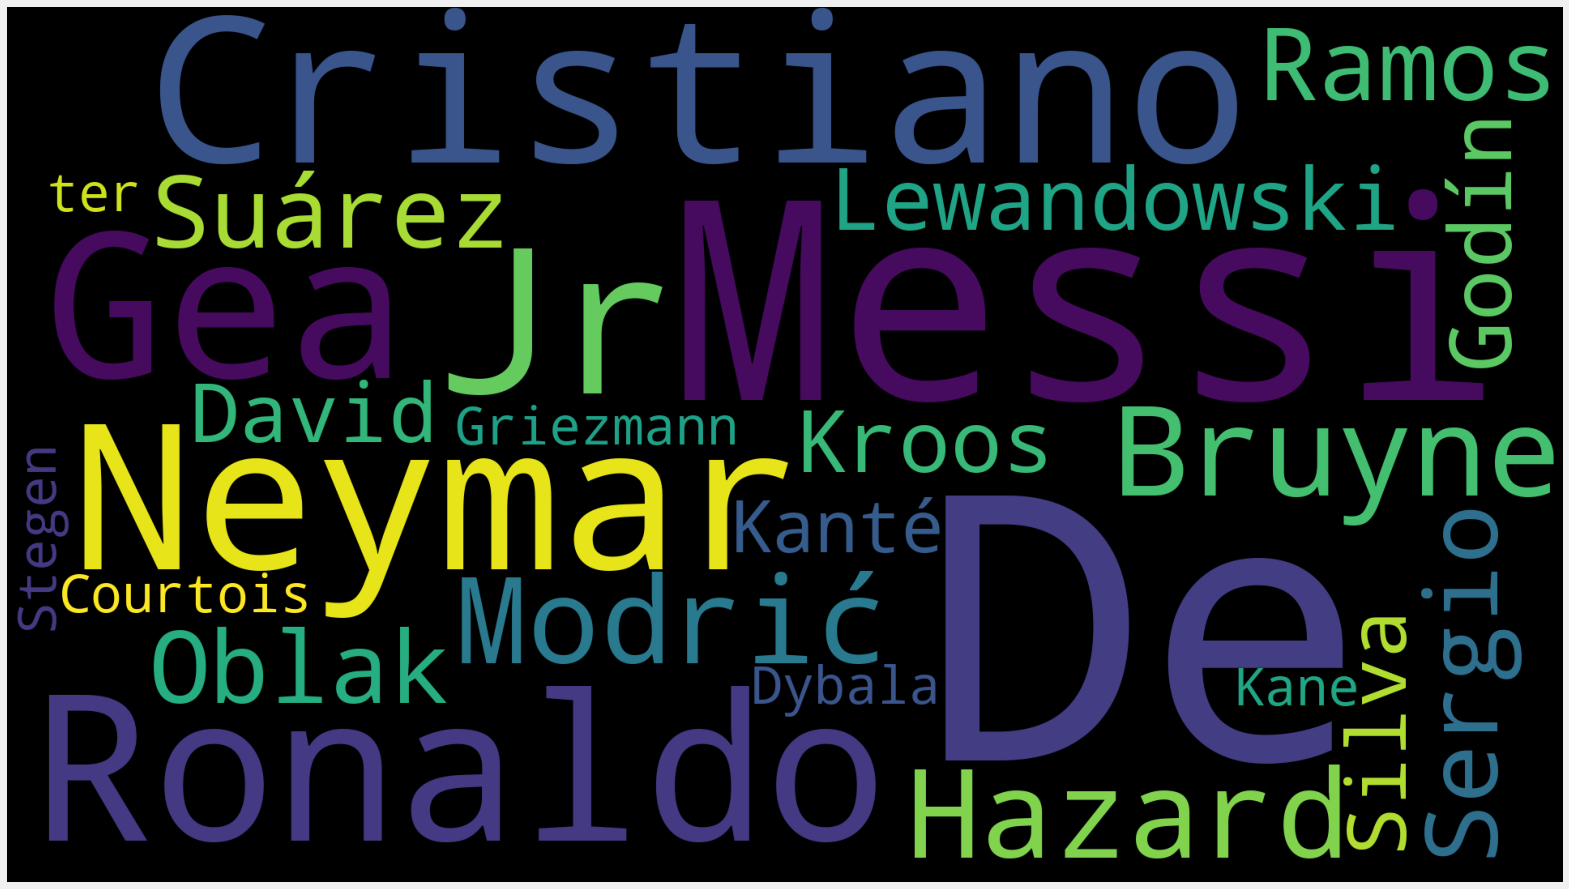

In [187]:
# showing the name of the players which occurs the most number of times from the first 20 names
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('players.png')
plt.show()

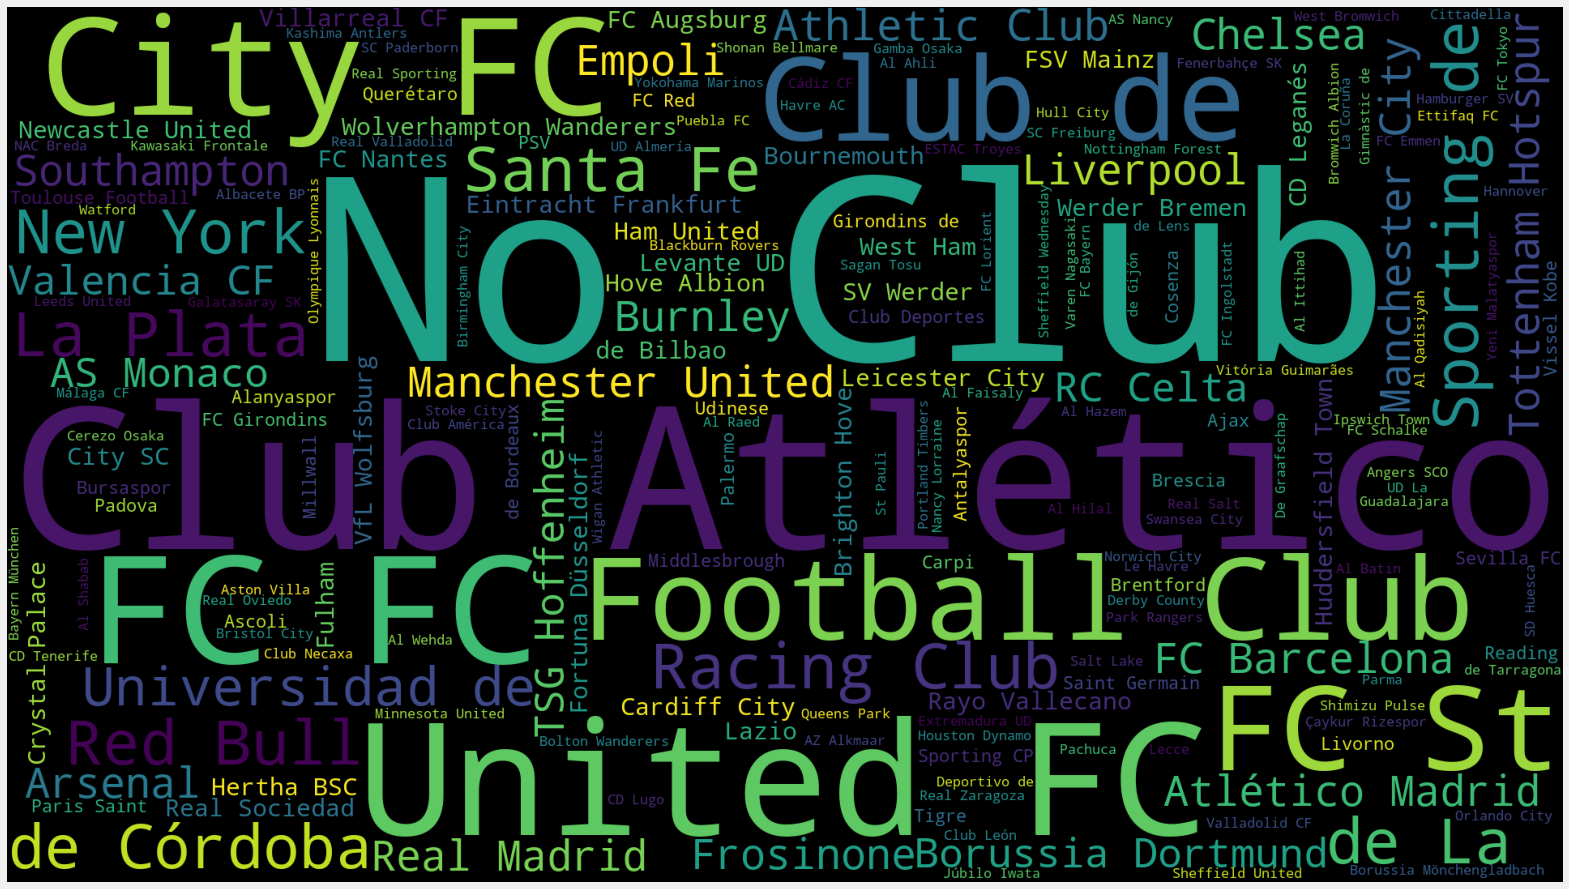

In [188]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('players.png')
plt.show()